# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [74]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

import seaborn as sns

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [52]:
## La altura hay que meterla en metros, si no se raya.
def imc(weight, height):  
    imc = weight / (height ** 2)
    return round(imc, 2)



b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [53]:
def saludable(imc):
    if 18.5<imc<25.9:
        return 'Saludable'
    elif imc<18.5:
        return 'Bajo peso'
    else:
        return 'Sobrepeso'
    
saludable(20)
saludable(30)
saludable(10)



'Bajo peso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [55]:


pesos = np.random.uniform(50, 100, 10)     
alturas = np.random.uniform(1.5, 2.0, 10)  

imcData = pd.DataFrame({
    'peso': pesos,
    'altura': alturas
})

imcData['imc'] = imcData.apply(lambda x: imc(x['peso'], x['altura']), axis=1)
imcData['categoria'] = imcData['imc'].apply(saludable)

imcData

,peso,altura,imc,categoria
0,69.426581,1.972816,17.84,Bajo peso
1,50.132533,1.609734,19.35,Saludable
2,84.387277,1.985041,21.42,Saludable
3,98.989717,1.664142,35.74,Sobrepeso
4,78.432988,1.515208,34.16,Sobrepeso
5,68.041360,1.539269,28.72,Sobrepeso
6,64.365669,1.986015,16.32,Bajo peso
7,64.357822,1.867727,18.45,Bajo peso
8,89.149812,1.528444,38.16,Sobrepeso
9,75.379940,1.730698,25.17,Saludable


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [58]:
##un vistazo

class HealthTools:
    def __init__(weight, height):
        self.weight=weight
        self.height=height
        
    def imc(self):  
        imc = self.weight / (self.height ** 2)
        return round(imc, 2)
    
    def saludable(imc):
        if 18.5<imc<25.9:
            return 'Saludable'
        elif imc<18.5:
            return 'Bajo peso'
        else:
            return 'Sobrepeso'
        
    
    
       


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [30]:
lifeStyleData=pd.read_csv('final_data.csv')
lifeStyleData.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [83]:
def describeData(df):
        print(df.dtypes)
        print(df.shape)
        print(df.isna().sum())
        print(df.isna().sum())
        print(df.describe(include='all'))

describeData(lifeStyleData)

Age                               float64
Gender                             object
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                           float64
Avg_BPM                           float64
Resting_BPM                       float64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                       object
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)     float64
Experience_Level                  float64
BMI                               float64
Daily meals frequency             float64
Physical exercise                 float64
Carbs                             float64
Proteins                          float64
Fats                              float64
Calories                          float64
meal_name                          object
meal_type                          object
diet_type                         

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [45]:
 describeData(lifeStyleData) 

Age                               float64
Gender                             object
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                           float64
Avg_BPM                           float64
Resting_BPM                       float64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                       object
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)     float64
Experience_Level                  float64
BMI                               float64
Daily meals frequency             float64
Physical exercise                 float64
Carbs                             float64
Proteins                          float64
Fats                              float64
Calories                          float64
meal_name                          object
meal_type                          object
diet_type                         

Viendo la salida de la función describeData, se puede observar que las únicas variables con valores faltantes son las siguientes: cholesterol_mg , Max_BPM y Avg_BPM.                                       

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

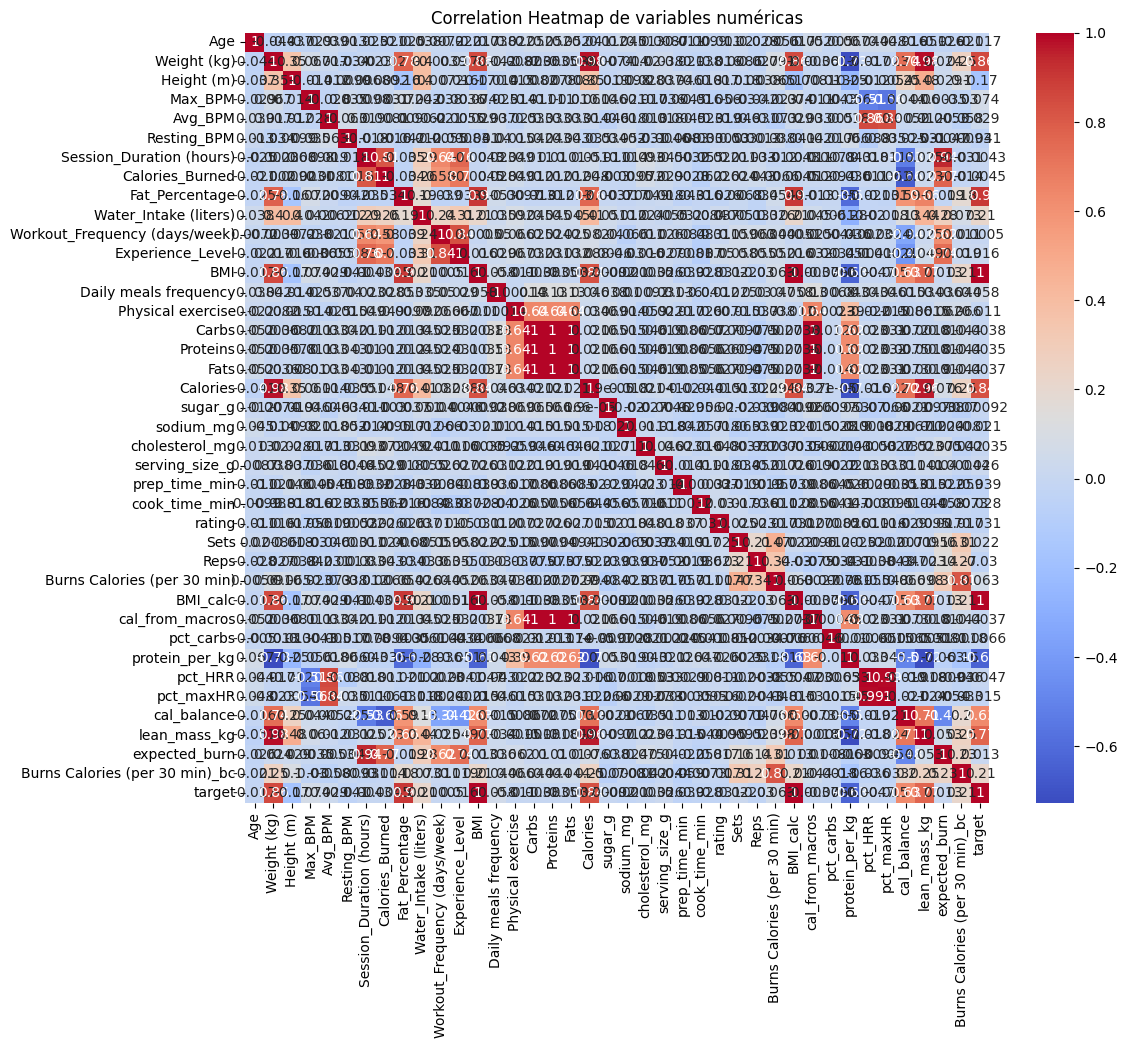

In [80]:
columnas_numericas = lifeStyleData.select_dtypes(include='number')

plt.figure(figsize=(12,10))
sns.heatmap(lifeStyleData.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap de variables numéricas')
plt.show()




In [157]:
#Para verlo de una manera más clara.
print(columnas_numericas.corr())

                                     Age  Weight (kg)  Height (m)   Max_BPM  \
Age                             1.000000    -0.044077   -0.037096 -0.028788   
Weight (kg)                    -0.044077     1.000000    0.353763  0.066906   
Height (m)                     -0.037096     0.353763    1.000000 -0.014376   
Max_BPM                        -0.028788     0.066906   -0.014376  1.000000   
Avg_BPM                         0.039278     0.016731   -0.012187 -0.027995   
Resting_BPM                     0.013387    -0.033578    0.009897  0.035500   
Session_Duration (hours)       -0.025410    -0.002275    0.006783  0.009761   
Calories_Burned                -0.021396    -0.001994    0.009211  0.003114   
Fat_Percentage                 -0.025056     0.778875   -0.156586  0.071910   
Water_Intake (liters)           0.037569     0.397971    0.398041  0.041655   
Workout_Frequency (days/week)   0.007182    -0.003894    0.007241 -0.038316   
Experience_Level               -0.022485     0.01653

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [158]:
lifeStyleData["target"] = lifeStyleData["BMI"]

X= lifeStyleData[['Fat_Percentage', 'lean_mass_kg','cal_balance']]
y = lifeStyleData['target']

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [160]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("R2:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("Variance explanation R^2 = {}".format(round(lr.score(X, y),2)))


R2: 0.8651229000583596
MSE: 6.124804824539913
Variance explanation R^2 = 0.87


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [161]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred_rf_reg))
print("MSE:", mean_squared_error(y_test, y_pred_rf_reg))



R2: 0.9031623809485828
MSE: 4.397421924253335


Se puede ver que el modelo de Random Forest tiene mayor R2 (apenas un 4%) lo cual significa que explica levemente mejor la varianza del modelo. Además, tiene un error medio menor que la regresión lineal. Por ambos motivos, tiene mejor rendimiento el Random Forest.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [162]:
#Creo una función estilo ejercicio 1 para que me haga la columna (al igual que he hecho antes las columnas de IMC y de saludable
def binaria(bmi):
    if 18.5<bmi<24.9:
        return 1
    else:
        return 0

In [163]:
lifeStyleData['bmiHealthy'] = lifeStyleData.apply(lambda x: binaria(x['BMI']), axis=1)
lifeStyleData

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,target,bmiHealthy
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,24.87,1
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,23.48,1
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,21.15,1
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,32.45,0
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,14.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium,27.23,0
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low,25.20,0
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High,16.57,0
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low,16.88,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [164]:
#uso las mismas variables de entrada que en el ejercicio anterior (las más correladas)
X= lifeStyleData[['Fat_Percentage', 'lean_mass_kg','cal_balance']]
y = lifeStyleData['bmiHealthy']

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las variables (mejor práctica para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamos el modelo
model = LogisticRegression(multi_class='multinomial', max_iter=200)
model.fit(X_train_scaled, y_train)


# d) Visualizar los coeficientes
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes promedio absolutos por variable para ver importancia general
coef_abs_mean = np.mean(np.abs(model.coef_), axis=0)




c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [165]:
# c) Precisión del modelo
accuracy = model.score(X_test, y_test)
print(f"Precisión (accuracy) del modelo: {accuracy:.2f}")

predictions = model.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, predictions))



Precisión (accuracy) del modelo: 0.62
Confusion matrix
[[3303  408]
 [1884  405]]


C:\Users\abmco\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\abmco\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [166]:


# Coeficientes promedio absolutos por variable para ver importancia general
coef_abs_mean = np.mean(np.abs(model.coef_), axis=0)

coef_abs_mean

array([0.30693001, 0.05879918, 0.18218587])

Con este modelo de clasificación podemos ver que ninguna de las tres variables elegidas parece ser realmente capaz de estimar con muchísimo acierto la Y en este modelo. La variable más influyente parece ser Fat_percentage que, 'casualmente', es también la más correlada con BMI quitando peso y altura.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Da la impresión que que altura, peso y porcentaje de peso son las variables reinas en este dataset. El modelo de clasificación ha funcionado al 60%, se pueden ver casi un 40% de fallos de las 5000 observaciones, un poco pobre

El modelo más eficaz de los utilizados ha sido el Random Forest regressor en regresión, viendo sus KPIS más relevantes (RMSE y R2) que mejoran claramente a su competidor aquí probado (regresión lineal).

Si tuviese más tiempo probaría los modelos con ariables diferenets. Haría una función que me devolviese realmente las variables más correladas con BMI o, incluso,m probaría a quitar variables del modelo (hay muchas y no creo que todas sean significativas. Nos interesa eliminar ruido y hacer este análisis solo con un 20% de las variables más relevantes). También, en esta misma línea, podríamos hacer un PCA.

Un análisis que podría ser de interés es dividir a las personas no saludables en gordos y delgados. Entiendo que, pese a estar ambos fuera del límite saludable, serán grupos con peculiaridades muy diferentes. Quizás, interese un clustering y ver qué variables son más relevantes en cada grupo. la segmentación nos ayudará a centrar el tiro.